In [2]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer
import torch
from sklearn.model_selection import train_test_split
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader

df = pd.read_csv('cleaned_data_final.csv')
df

,title,body,text,label
0,How do you stop MySQL on a Mac OS install?,installed mysql via macports command need stop...,How do you stop MySQL on a Mac OS install? ins...,question
1,Mac SQLite editor,aware cocoamysql seen mac gui sqlite one googl...,Mac SQLite editor aware cocoamysql seen mac gu...,question
2,Mac OS X wants to use system keychain when com...,asked type system admin user name password com...,Mac OS X wants to use system keychain when com...,question
3,How to download Xcode DMG or XIP file?,mac app store download file lion need dmg file...,How to download Xcode DMG or XIP file? mac app...,bug
4,How do you change the capitalization of filena...,trying rename file different capitalization gi...,How do you change the capitalization of filena...,question
...,...,...,...,...
4517,OS command injection vulnerability exists in a...,o command injection vulnerability exists awkbl...,OS command injection vulnerability exists in a...,Vulnerabilitiy
4518,A vulnerability has been found in Tenda W30E 1...,vulnerability found tenda w30e 10125633 classi...,A vulnerability has been found in Tenda W30E 1...,Vulnerabilitiy
4519,An Uncontrolled Resource Consumption vulnerabi...,uncontrolled resource consumption vulnerabilit...,An Uncontrolled Resource Consumption vulnerabi...,Vulnerabilitiy
4520,rejetto HFS (aka HTTP File Server) 3 before 0....,rejetto hf aka http file server 3 05210 linux ...,rejetto HFS (aka HTTP File Server) 3 before 0....,Vulnerabilitiy


In [3]:
question_df = df[df['label'] == 'question']
vulnerability_df = df[df['label'] == 'vulnerability']
bug_df = df[df['label'] == 'bug']

question_df
# vulnerability_df
# bug_df

# question_df.shape()
# vulnerability_df.shape()
# bug_df.shape()

,title,body,text,label
0,How do you stop MySQL on a Mac OS install?,installed mysql via macports command need stop...,How do you stop MySQL on a Mac OS install? ins...,question
1,Mac SQLite editor,aware cocoamysql seen mac gui sqlite one googl...,Mac SQLite editor aware cocoamysql seen mac gu...,question
2,Mac OS X wants to use system keychain when com...,asked type system admin user name password com...,Mac OS X wants to use system keychain when com...,question
4,How do you change the capitalization of filena...,trying rename file different capitalization gi...,How do you change the capitalization of filena...,question
5,Best way to detect Mac OS X or Windows compute...,im trying move close button left side user mac...,Best way to detect Mac OS X or Windows compute...,question
...,...,...,...,...
404,Editing large files on Mac OS X,anyone recommendation programmer editor cope l...,Editing large files on Mac OS X anyone recomme...,question
405,Adding a directory to the PATH environment var...,trying add cxamppphp system path environment v...,Adding a directory to the PATH environment var...,question
406,"OS X Bash, &#39;watch&#39; command",im looking best way duplicate linux watch comm...,"OS X Bash, &#39;watch&#39; command im looking ...",question
409,&quot;rm -rf&quot; equivalent for Windows?,need way recursively delete folder child prebu...,&quot;rm -rf&quot; equivalent for Windows? nee...,question


In [4]:
vulnerability_df_sample = vulnerability_df.sample(n=257)
bug_df_sample = bug_df.sample(n=257)

vulnerability_df_sample
#bug_df_sample

,title,body,text,label
1054,Apple Safari 1.0 through 1.1 on Mac OS X 10.3....,apple safari 10 11 mac o x 1031 mac o x 1028 a...,Apple Safari 1.0 through 1.1 on Mac OS X 10.3....,vulnerability
1598,"ICQ Inc. (formerly Mirabilis) ICQ 2003a, 2003b...",icq inc formerly mirabilis icq 2003a 2003b lit...,"ICQ Inc. (formerly Mirabilis) ICQ 2003a, 2003b...",vulnerability
2922,"The kernel in Microsoft Windows 2000 SP4, XP S...",kernel microsoft window 2000 sp4 xp sp2 sp3 se...,"The kernel in Microsoft Windows 2000 SP4, XP S...",vulnerability
1059,"Directory Services in Apple Mac OS X 10.0.2, 1...",directory service apple mac o x 1002 1003 1028...,"Directory Services in Apple Mac OS X 10.0.2, 1...",vulnerability
3548,Adobe Flash Player before 9.0.277.0 and 10.x b...,adobe flash player 902770 10x 1015364 adobe ai...,Adobe Flash Player before 9.0.277.0 and 10.x b...,vulnerability
...,...,...,...,...
645,Telnet Service for Windows 2000 Professional d...,telnet service window 2000 professional proper...,Telnet Service for Windows 2000 Professional d...,vulnerability
1763,"Password Safe 2.11, 2.16 and 3.0BETA1 does not...",password safe 211 216 30beta1 respect configur...,"Password Safe 2.11, 2.16 and 3.0BETA1 does not...",vulnerability
935,GlobalSunTech Wireless Access Points (1) WISEC...,globalsuntech wireless access point 1 wisecom ...,GlobalSunTech Wireless Access Points (1) WISEC...,vulnerability
612,The Apache 1.3.x HTTP server for Windows platf...,apache 13x http server window platform allows ...,The Apache 1.3.x HTTP server for Windows platf...,vulnerability


In [5]:
train_df = pd.concat([question_df, vulnerability_df_sample, bug_df_sample])
train_df

,title,body,text,label
0,How do you stop MySQL on a Mac OS install?,installed mysql via macports command need stop...,How do you stop MySQL on a Mac OS install? ins...,question
1,Mac SQLite editor,aware cocoamysql seen mac gui sqlite one googl...,Mac SQLite editor aware cocoamysql seen mac gu...,question
2,Mac OS X wants to use system keychain when com...,asked type system admin user name password com...,Mac OS X wants to use system keychain when com...,question
4,How do you change the capitalization of filena...,trying rename file different capitalization gi...,How do you change the capitalization of filena...,question
5,Best way to detect Mac OS X or Windows compute...,im trying move close button left side user mac...,Best way to detect Mac OS X or Windows compute...,question
...,...,...,...,...
176,Docker for Windows error: &quot;Hardware assis...,ive installed docker im getting error run gui ...,Docker for Windows error: &quot;Hardware assis...,bug
104,"Node.js/Windows error: ENOENT, stat &#39;C:\Us...",window 7 32bit installed latest nodejs 32 bit ...,"Node.js/Windows error: ENOENT, stat &#39;C:\Us...",bug
2466,Buffer overflow in the RPC library (lib/rpc/rp...,buffer overflow rpc library librpcrpcdtablesiz...,Buffer overflow in the RPC library (lib/rpc/rp...,bug
2362,Quick Look in Apple Mac OS X 10.5.1 does not p...,quick look apple mac o x 1051 prevent movie ac...,Quick Look in Apple Mac OS X 10.5.1 does not p...,bug


In [6]:
has_nan = train_df.isna().any().any()
has_nan

False

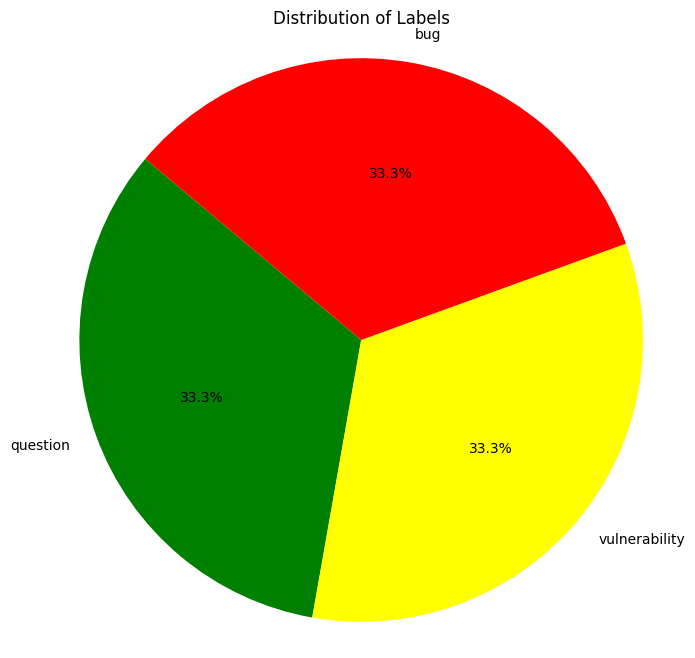

In [7]:
import matplotlib.pyplot as plt

label_counts = train_df['label'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'yellow', 'red'])
plt.title('Distribution of Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [8]:
label_map = {'vulnerability': 0, 'bug': 1, 'question': 2}
train_df['label'] = df['label'].map(label_map)
train_df['label'] = train_df['label'].astype(int)
train_df

,title,body,text,label
0,How do you stop MySQL on a Mac OS install?,installed mysql via macports command need stop...,How do you stop MySQL on a Mac OS install? ins...,2
1,Mac SQLite editor,aware cocoamysql seen mac gui sqlite one googl...,Mac SQLite editor aware cocoamysql seen mac gu...,2
2,Mac OS X wants to use system keychain when com...,asked type system admin user name password com...,Mac OS X wants to use system keychain when com...,2
4,How do you change the capitalization of filena...,trying rename file different capitalization gi...,How do you change the capitalization of filena...,2
5,Best way to detect Mac OS X or Windows compute...,im trying move close button left side user mac...,Best way to detect Mac OS X or Windows compute...,2
...,...,...,...,...
176,Docker for Windows error: &quot;Hardware assis...,ive installed docker im getting error run gui ...,Docker for Windows error: &quot;Hardware assis...,1
104,"Node.js/Windows error: ENOENT, stat &#39;C:\Us...",window 7 32bit installed latest nodejs 32 bit ...,"Node.js/Windows error: ENOENT, stat &#39;C:\Us...",1
2466,Buffer overflow in the RPC library (lib/rpc/rp...,buffer overflow rpc library librpcrpcdtablesiz...,Buffer overflow in the RPC library (lib/rpc/rp...,1
2362,Quick Look in Apple Mac OS X 10.5.1 does not p...,quick look apple mac o x 1051 prevent movie ac...,Quick Look in Apple Mac OS X 10.5.1 does not p...,1


In [9]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
training_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)
print(training_df.shape)
print(val_df.shape)

(616, 4)
(155, 4)


In [11]:
train_encodings = tokenizer(training_df['text'].tolist(), truncation=True, padding=True)
val_encodings = tokenizer(val_df['text'].tolist(), truncation=True, padding=True)

In [12]:
class StackOverflowDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['label'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)



In [13]:
train_dataset = StackOverflowDataset(train_encodings, training_df['label'].tolist())
val_dataset = StackOverflowDataset(val_encodings, val_df['label'].tolist())
# print(train_dataset[0])
# print(val_dataset[0])

In [14]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    accuracy = accuracy_score(labels, preds)
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }



In [18]:
training_args = TrainingArguments(
    output_dir='./results',
    do_train=True,
    do_eval=True,
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    gradient_accumulation_steps=2,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    logging_strategy='steps',
    evaluation_strategy='steps',
    eval_steps=50,
    save_strategy='steps',
    fp16=True,
    load_best_model_at_end=True,
    overwrite_output_dir=True,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [19]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)


In [20]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
50,0.408400,0.577338,0.729032,0.717985,0.717279,0.711465
100,0.248400,0.659385,0.716129,0.722988,0.710068,0.713331
150,0.174300,0.759006,0.683871,0.707792,0.675850,0.669588


TrainOutput(global_step=190, training_loss=0.2903940025128816, metrics={'train_runtime': 88.1376, 'train_samples_per_second': 34.945, 'train_steps_per_second': 2.156, 'total_flos': 799864789893120.0, 'train_loss': 0.2903940025128816, 'epoch': 4.935064935064935})

In [21]:
q=[trainer.evaluate(eval_dataset = train_df) for train_df in [train_dataset, val_dataset]]

pd.DataFrame(q, index=["train", "val"]).iloc[:, :5]

,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1
train,0.070260,0.990260,0.990384,0.990369,0.990361
val,0.756809,0.741935,0.731470,0.732177,0.729915


In [22]:
model_save_path = '/content/model'
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

('/content/model/tokenizer_config.json',
 '/content/model/special_tokens_map.json',
 '/content/model/vocab.txt',
 '/content/model/added_tokens.json')

In [23]:
import tarfile

def create_model_tar_gz(model_dir):
    with tarfile.open('/content/model.tar.gz', 'w:gz') as tar:
        tar.add(model_dir, arcname='.')

create_model_tar_gz(model_save_path)

In [24]:
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 7.7 MB/s eta 0:00:00


In [27]:
import boto3

# Configure boto3 to use your AWS credentials
s3 = boto3.client(
    's3',
    aws_access_key_id='****************',
    aws_secret_access_key='***********************',
    region_name='us-east-1'  # Example: 'us-west-2'
)

bucket_name = 'q-forums-bucket'
local_file_path = './model.tar.gz'  # Replace with your model file path
s3_file_key = 'models/model.tar.gz'  # Path in S3 bucket

# Upload the file
s3.upload_file(local_file_path, bucket_name, s3_file_key)

print(f"Uploaded {local_file_path} to s3://{bucket_name}/{s3_file_key}")

Uploaded ./model.tar.gz to s3://q-forums-bucket/models/model.tar.gz


In [60]:
def predict(text):
  inputs = tokenizer(text, truncation=True, padding=True, return_tensors='pt').to('cuda')
  with torch.no_grad():
    outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits, dim=1)


  label_map = {'vulnerability': 0, 'bug': 1, 'question': 2}
  predicted_category = list(label_map.keys())[list(label_map.values()).index(predicted_class)]
  return predicted_category


In [61]:
new_post_text = "The configuration tools (1) config.sh in Unix or (2) config.cmd in Windows for BEA WebLogic Server 8.1 through SP2 create a log file that contains the administrative username and password in cleartext, which could allow local users to gain privileges. configuration tool 1 configsh unix 2 configcmd window bea weblogic server 81 sp2 create log file contains administrative username password cleartext could allow local user gain privilege"
predict(new_post_text)

'bug'

In [63]:
new_post_text = "A vulnerability in mlflow/mlflow version 8.2.1 allows for remote code execution due to improper neutralization of special elements used in an OS command ('Command Injection') within the `mlflow.data.http_dataset_source.py` module. Specifically, when loading a dataset from a source URL with an HTTP scheme, the filename extracted from the `Content-Disposition` header or the URL path is used to generate the final file path without proper sanitization. This flaw enables an attacker to control the file path fully by utilizing path traversal or absolute path techniques, such as '../../tmp/poc.txt' or '/tmp/poc.txt', leading to arbitrary file write. Exploiting this vulnerability could allow a malicious user to execute commands on the vulnerable machine, potentially gaining access to data and model information. The issue is fixed in version 2.9.0. vulnerability mlflowmlflow version 821 allows remote code execution due improper neutralization special element used o command command injection within mlflowdatahttpdatasetsourcepy module specifically loading dataset source url http scheme filename extracted contentdisposition header url path used generate final file path without proper sanitization flaw enables attacker control file path fully utilizing path traversal absolute path technique tmppoctxt tmppoctxt leading arbitrary file write exploiting vulnerability could allow malicious user execute command vulnerable machine potentially gaining access data model information issue fixed version 290"
predict(new_post_text)

'vulnerability'

In [3]:
!pip install boto3
import boto3

s3 = boto3.client('s3')
bucket_name = 'q-forums-bucket'
keys = [
    'data/train_encodings.npz',
    'data/val_encodings.npz',
    'data/train_labels.npz',
    'data/val_labels.npz'
]

for key in keys:
    try:
        s3.head_object(Bucket=bucket_name, Key=key)
        print(f'{key} exists')
    except Exception as e:
        print(f'{key} not found: {e}')

data/train_encodings.npz not found: Unable to locate credentials
data/val_encodings.npz not found: Unable to locate credentials
data/train_labels.npz not found: Unable to locate credentials
data/val_labels.npz not found: Unable to locate credentials
